# Loan Decision Feature Analysis – Creditstar Assignment

## 1. Setup & Load Data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Parquet file
df = pd.read_parquet("../data/processed/client_features.parquet")

# Quick check
df


,client_id,paid_loans,days_since_late,profit_rate_90d,decision
0,44127,2,NaN,NaN,REJECT
1,11233,1,NaN,NaN,REJECT
2,47051,2,NaN,NaN,REJECT
3,29007,1,NaN,NaN,REJECT
4,55864,1,NaN,NaN,REJECT
...,...,...,...,...,...
45528,61986,1,NaN,0.240714,REJECT
45529,78448,1,1746.0,NaN,REJECT
45530,95318,1,NaN,0.222857,REJECT
45531,86036,1,NaN,NaN,REJECT


 ## 2. Dataset Overview


In [64]:
# Basic info
df.info()

# Summary stats
df.describe()

# Check for nulls
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        45533 non-null  int64  
 1   paid_loans       45533 non-null  int64  
 2   days_since_late  3847 non-null   float64
 3   profit_rate_90d  12454 non-null  float64
 4   decision         45533 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ MB


client_id              0
paid_loans             0
days_since_late    41686
profit_rate_90d    33079
decision               0
dtype: int64

## 3. Distribution of Decisions

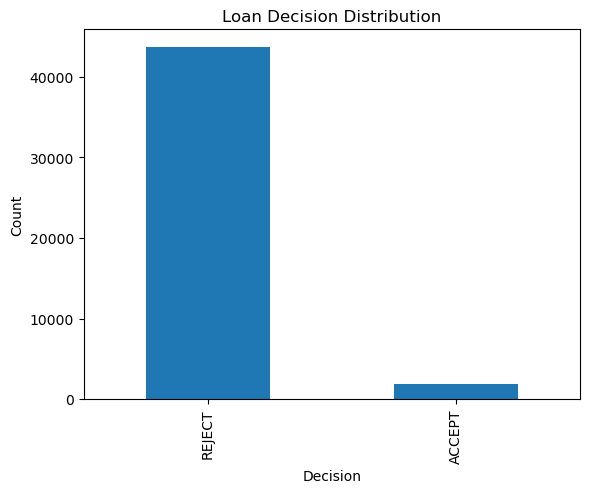

ACCEPT count: 1826
REJECT count: 43707


In [65]:
df['decision'].value_counts().plot(kind='bar', title='Loan Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

print("ACCEPT count:", (df['decision'] == "ACCEPT").sum())
print("REJECT count:", (df['decision'] == "REJECT").sum())


## 4. Feature Analysis

### Paid Loans

Text(0.5, 1.0, 'Distribution of Paid Loans')

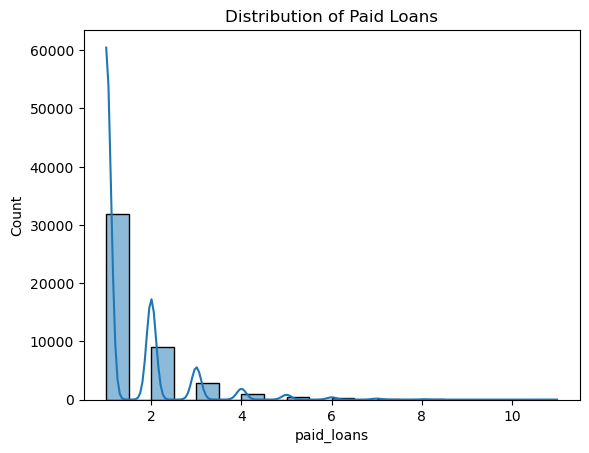

In [66]:
sns.histplot(df['paid_loans'], bins=20, kde=True)
plt.title('Distribution of Paid Loans')

### Days Since Last Late Payment

Text(0.5, 1.0, 'Days Since Last Late Payment')

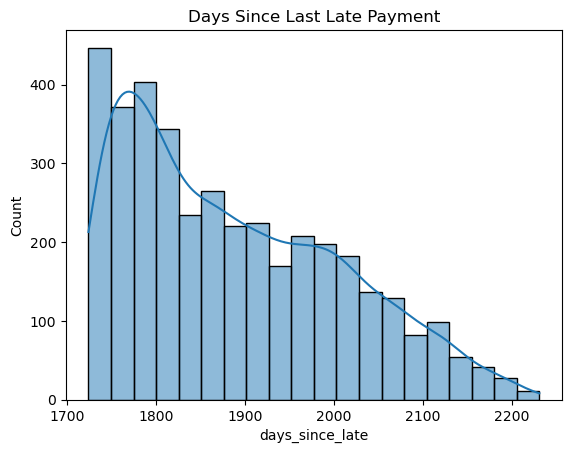

In [67]:
sns.histplot(df['days_since_late'], bins=20, kde=True)
plt.title('Days Since Last Late Payment')

### Profit Rate (Last 90 Days)

Text(0.5, 1.0, 'Profit Rate (Last 90 Days)')

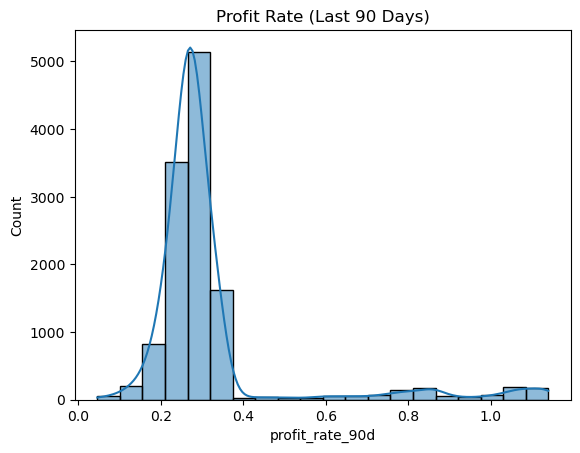

In [68]:
sns.histplot(df['profit_rate_90d'], bins=20, kde=True)
plt.title('Profit Rate (Last 90 Days)')

## 5. Validate Decision Logic


In [69]:
conditions_met = df[
    (df['paid_loans'] >= 3) &
    (df['profit_rate_90d'].fillna(0) > 0.1) &
    (df['days_since_late'].fillna(9999) > 30)
]

print("Rows meeting decision criteria:", conditions_met.shape[0])
print("ACCEPT in output:", (df['decision'] == "ACCEPT").sum())

# Compare both
assert conditions_met.shape[0] == (df['decision'] == "ACCEPT").sum(), "Mismatch in logic!"


Rows meeting decision criteria: 1826
ACCEPT in output: 1826
